In [1]:
###
### Taken from the github repositroy of trectools library https://github.com/joaopalotti/trectools
###
###
from trectools import TrecQrel, procedures, TrecRun, TrecEval, TrecRes
from os import listdir
import pandas as pd

In [2]:
qrels_file = "touche2020-task1-relevance-args-me-corpus-version-2020-04-01.qrels"
#qrels_file = "new_rated.qrel"
qrels = TrecQrel(qrels_file)
names = ["new_args_original", "new_args_t5expansion", "new_args_naiveexpansion"]
folder = ""

Found 1 runs in path ./runs/test/
      ndcg5                        method
0  0.643419  args_gpt2expansion_qe0_rank0


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 1 runs in path ./runs/test/
      ndcg5                        method
0  0.643419  args_gpt2expansion_qe0_rank0


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 1 runs in path ./runs/test/
      ndcg5                        method
0  0.643419  args_gpt2expansion_qe0_rank0


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


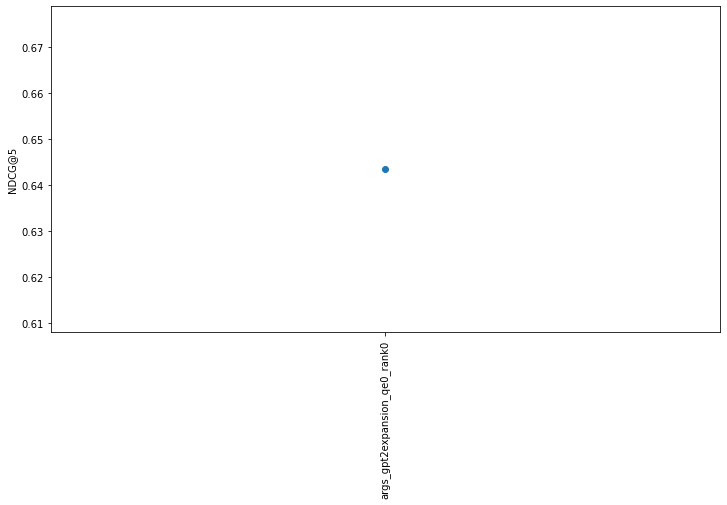

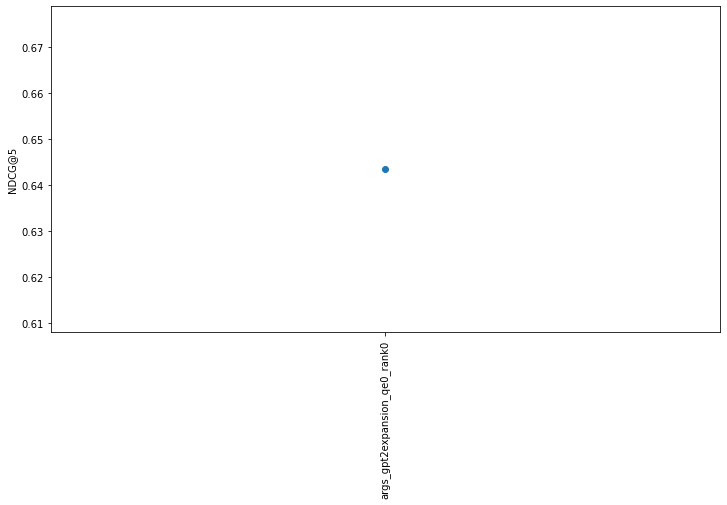

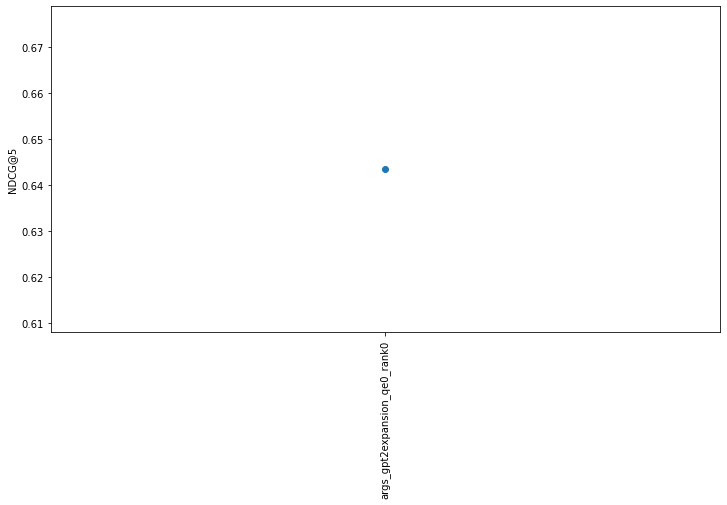

In [3]:
for name in names: 
    index = "query_expansion"
    path_to_runs = f"./runs/"
    runs = procedures.list_of_runs_from_path(path_to_runs, "*.txt")

    s = []
    for i in range(len(runs)):
        evaluator = TrecEval(runs[i], qrels)
        ndcg_5 = evaluator.get_ndcg(depth=5)
        s = s +[{"ndcg5": ndcg_5, "method": runs[i].get_runid()}]
        
    s = pd.DataFrame(s).sort_values(by="ndcg5", ascending=False)
    print(s)
    #s.to_csv(f"{index}/{name}.csv")



    results = []
    for r in runs:
        evaluator = TrecEval(r, qrels)
        ndcg_5 = evaluator.get_ndcg(depth=5)

        result_run = [{"metric": "NDCG_5", "query": "all", "value": ndcg_5}]
        results
        tres = TrecRes()
        tres.data = pd.DataFrame(result_run)
        tres.runid = r.get_runid() 
        results.append(tres)

    ndcg5 = procedures.extract_metric_from_results(results, "NDCG_5")
    # Note that error bars are not ploted. If you want error bars, you have to evaluate NDCG with per_query = True
    procedures.plot_system_rank(ndcg5, display_metric="NDCG@5")#.savefig(f"{index}/{name}.png", bbox_inches='tight', dpi=600)

In [7]:

for name in names: 
    index = "final"
    path_to_runs = f"./runs/"
    runs = procedures.list_of_runs_from_path(path_to_runs, "*.txt")

    s = []

    for i in range(len(runs)):
        evaluator = TrecEval(runs[i], qrels)
        ndcg_5 = evaluator.get_precision(depth=10)
        s = s +[{"p@10": ndcg_5, "method": runs[i].get_runid()}]
    
    s = pd.DataFrame(s).sort_values(by="p@10", ascending=False)
    print(s)
    #s.to_csv(f"rerated_precision/P@10_{name}.csv")
    

Found 1 runs in path ./runs/test/
    p@10                        method
0  0.554  args_gpt2expansion_qe0_rank0
Found 1 runs in path ./runs/test/
    p@10                        method
0  0.554  args_gpt2expansion_qe0_rank0
Found 1 runs in path ./runs/test/
    p@10                        method
0  0.554  args_gpt2expansion_qe0_rank0
